# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [4]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [5]:
X = df.drop(['Label'], axis = 1)
y = df['Label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
performance_scores = []

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred),'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))
performance_scores.append(['Unbalanced','Logistic Regression','No target','No k',metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   

Accuracy 0.9942043193679536 F1 score 0.0 F Beta score 0.0


In [7]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred),'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))
performance_scores.append(['Unbalanced','Decision Tree','No target','No k',metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   

Accuracy 0.9942331535999539 F1 score 0.06542056074766354 F Beta score 0.0356782398062172


In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 4, random_state = 42, n_estimators=50)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred),'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))
performance_scores.append(['Unbalanced','Random Forest','No target','No k',metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   

Accuracy 0.9942331535999539 F1 score 0.02912621359223301 F Beta score 0.015296849757673666


En los 3 casos se observa que la precisión es la misma lo que lleva a pensar que es probable que con las tres alternativas se esté clasificando todos los datos en la categoría negativa.

# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [9]:
n_samples = y.shape[0]
n_samples_0 = (y == 0).sum()
n_samples_1 = (y == 1).sum()
n_samples_0_new =  n_samples_1 / 0.5 - n_samples_1
n_samples_0_new
n_samples_0_new_per = n_samples_0_new / n_samples_0
n_samples_0_new_per

0.005778544705779994

In [10]:
filter_ = y == 0
np.random.seed(42)
rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)

filter_ = filter_ & rand_1
filter_.sum()

757

In [11]:
filter_ = filter_ | (y == 1)
filter_ = filter_.astype(bool)

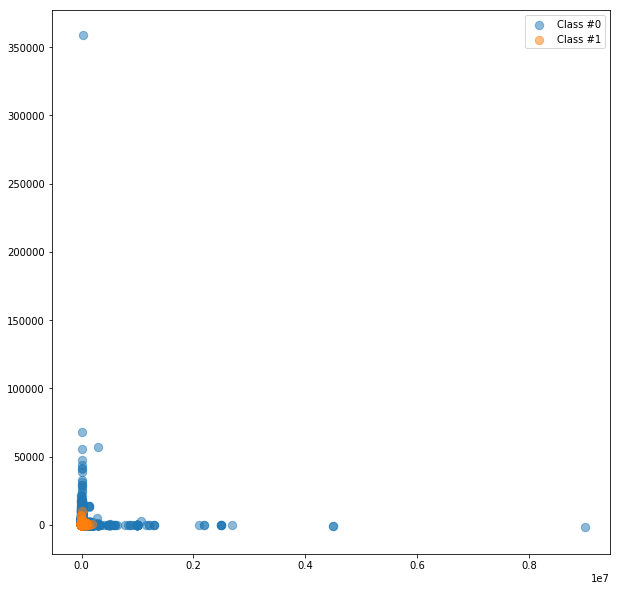

In [12]:
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X_train)

def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, y_train)

In [13]:
y.mean()

0.0057453449730033666

In [14]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [15]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    logreg = LogisticRegression()
    logreg.fit(X_u, y_u)
    y_pred = logreg.predict(X_test)
    performance_scores.append(['Under sampling','Logistic Regression',target_percentage,'No k',metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
    print('Target percentage', target_percentage,'Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred), 'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))


Target percentage 0.1 Accuracy 0.9935988004959488 F1 score 0.0 F Beta score 0.0
Target percentage 0.2 Accuracy 0.9705602491277645 F1 score 0.046685340802987856 F Beta score 0.12213998935809993
Target percentage 0.3 Accuracy 0.9352959833914823 F1 score 0.0352536543422184 F Beta score 0.1888453119299526
Target percentage 0.4 Accuracy 0.8670453562469363 F1 score 0.031912660088179716 F Beta score 0.31504206854093986
Target percentage 0.5 Accuracy 0.5890256913007123 F1 score 0.017779615464130656 F Beta score 0.38193650514466626


In [16]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)
    clf.fit(X_u, y_u)
    y_pred = clf.predict(X_test)
    performance_scores.append(['Under sampling','Decision Tree',target_percentage,'No k', metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
    print('Target percentage', target_percentage,'Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred), 'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))

Target percentage 0.1 Accuracy 0.9884086387359072 F1 score 0.13733905579399144 F Beta score 0.16105242176599563
Target percentage 0.2 Accuracy 0.9709639283757677 F1 score 0.076993583868011 F Beta score 0.204996858841154
Target percentage 0.3 Accuracy 0.9349788068394799 F1 score 0.05845511482254698 F Beta score 0.32140746465427106
Target percentage 0.4 Accuracy 0.8305123843026441 F1 score 0.03576115485564304 F Beta score 0.4283990972060083
Target percentage 0.5 Accuracy 0.8190651941985525 F1 score 0.03742905353581837 F Beta score 0.47172772864744833


In [17]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    clf = RandomForestClassifier(max_depth = 4, random_state = 42, n_estimators=50)
    clf.fit(X_u, y_u)
    y_pred = clf.predict(X_test)
    performance_scores.append(['Under sampling','Random Forest',target_percentage,'No k',metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
    print('Target percentage', target_percentage,'Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred), 'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10)) 

Target percentage 0.1 Accuracy 0.9933969608719472 F1 score 0.12927756653992395 F Beta score 0.08643342562295495
Target percentage 0.2 Accuracy 0.9889853233759118 F1 score 0.16593886462882096 F Beta score 0.19132602193419737
Target percentage 0.3 Accuracy 0.9718866237997751 F1 score 0.12082957619477007 F Beta score 0.32673458548597367
Target percentage 0.4 Accuracy 0.8568380381188547 F1 score 0.04610951008645533 F Beta score 0.4885717740960213
Target percentage 0.5 Accuracy 0.7933450592543467 F1 score 0.035007405412683455 F Beta score 0.4857745384586925


# Exercise 15.3

Same analysis using random-over-sampling

In [18]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.iloc[filter_], y.iloc[filter_]

In [19]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train, y_train, target_percentage, 1)
    logreg = LogisticRegression()
    logreg.fit(X_u, y_u)
    y_pred = logreg.predict(X_test)
    performance_scores.append(['Over sampling','Logistic Regression',target_percentage,'No k', metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
    print('Target percentage', target_percentage,'Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred), 'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))

Target percentage 0.1 Accuracy 0.9942908220639544 F1 score 0.0 F Beta score 0.0
Target percentage 0.2 Accuracy 0.9847178570398778 F1 score 0.01851851851851852 F Beta score 0.02507198887895939
Target percentage 0.3 Accuracy 0.946627836567573 F1 score 0.03844155844155844 F Beta score 0.17359594927300598
Target percentage 0.4 Accuracy 0.9046163605432369 F1 score 0.03837209302325581 F Beta score 0.2892978040100685
Target percentage 0.5 Accuracy 0.5807791009486463 F1 score 0.018762232570695824 F Beta score 0.4078851796972602


In [20]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train, y_train, target_percentage, 1)
    clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)
    clf.fit(X_u, y_u)
    y_pred = clf.predict(X_test)
    performance_scores.append(['Over sampling','Decision Tree',target_percentage,'No k',metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
    print('Target percentage', target_percentage,'Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred), 'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))

Target percentage 0.1 Accuracy 0.9909460511519276 F1 score 0.1229050279329609 F Beta score 0.11132264529058115
Target percentage 0.2 Accuracy 0.9699258960237594 F1 score 0.08105726872246695 F Beta score 0.22404397936056325
Target percentage 0.3 Accuracy 0.9427640494795421 F1 score 0.061465721040189124 F Beta score 0.3022977390984022
Target percentage 0.4 Accuracy 0.8431417779187451 F1 score 0.04225352112676056 F Beta score 0.4793924531287082
Target percentage 0.5 Accuracy 0.8431417779187451 F1 score 0.04225352112676056 F Beta score 0.4793924531287082


In [21]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train, y_train, target_percentage, 1)
    clf = RandomForestClassifier(max_depth = 4, random_state = 42, n_estimators=50)
    clf.fit(X_u, y_u)
    y_pred = clf.predict(X_test)
    performance_scores.append(['Over sampling','Random Forest',target_percentage,'No k', metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
    print('Target percentage', target_percentage,'Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred), 'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))

Target percentage 0.1 Accuracy 0.9937718058879502 F1 score 0.13599999999999998 F Beta score 0.08649002619383436
Target percentage 0.2 Accuracy 0.9902828638159222 F1 score 0.16790123456790124 F Beta score 0.1716399260258909
Target percentage 0.3 Accuracy 0.9719731264957758 F1 score 0.12274368231046931 F Beta score 0.33162723322066634
Target percentage 0.4 Accuracy 0.873129379198985 F1 score 0.04844290657439446 F Beta score 0.4669363493767027
Target percentage 0.5 Accuracy 0.8000634353104005 F1 score 0.036944444444444446 F Beta score 0.5011939407506902


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

Intentar dos o tres combinaciones de parámetros porque las iteraciones toma mucho tiempo. No hacer grid search.

In [22]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
        
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    return X, y

In [23]:
for target_percentage in [0.1,0.2,0.3,0.4,0.5]:
    for k in [5, 10, 15]:
        X_u, y_u = SMOTE(X_train, y_train, target_percentage,k, 1)
        logreg = LogisticRegression()
        logreg.fit(X_u, y_u)
        y_pred = logreg.predict(X_test)
        performance_scores.append(['SMOTE','Logistic Regression',target_percentage,k,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
        print('Target percentage', target_percentage,'k',k,'Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred), 'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))

Target percentage 0.1 k 5 Accuracy 0.9913497303999308 F1 score 0.0 F Beta score 0.0
Target percentage 0.1 k 10 Accuracy 0.9933392924079467 F1 score 0.0 F Beta score 0.0
Target percentage 0.1 k 15 Accuracy 0.9939736455119518 F1 score 0.0 F Beta score 0.0
Target percentage 0.2 k 5 Accuracy 0.9779994809838239 F1 score 0.02554278416347382 F Beta score 0.04954623497669855
Target percentage 0.2 k 10 Accuracy 0.9692915429197543 F1 score 0.03269754768392371 F Beta score 0.08781336038255325
Target percentage 0.2 k 15 Accuracy 0.9719154580317754 F1 score 0.033730158730158735 F Beta score 0.08330907326540513
Target percentage 0.3 k 5 Accuracy 0.933248752919466 F1 score 0.035014589412255104 F Beta score 0.19280941775373847
Target percentage 0.3 k 10 Accuracy 0.9425622098555405 F1 score 0.025440313111545987 F Beta score 0.12131571652961289
Target percentage 0.3 k 15 Accuracy 0.9294714685274358 F1 score 0.03013481363996828 F Beta score 0.1734767673115169
Target percentage 0.4 k 5 Accuracy 0.82760012

In [24]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for k in [5, 10, 15]:
        X_u, y_u = SMOTE(X_train, y_train, target_percentage,k, 1)
        clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)
        clf.fit(X_u, y_u)
        y_pred = clf.predict(X_test)
        performance_scores.append(['SMOTE','Decision Tree',target_percentage,k,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
        print('Target percentage', target_percentage,'k',k,'Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred), 'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))

Target percentage 0.1 k 5 Accuracy 0.9848620281998789 F1 score 0.12935323383084577 F Beta score 0.1949517446176689
Target percentage 0.1 k 10 Accuracy 0.9868804244398951 F1 score 0.099009900990099 F Beta score 0.12557815686079474
Target percentage 0.1 k 15 Accuracy 0.9888699864479109 F1 score 0.10648148148148147 F Beta score 0.11595288010382349
Target percentage 0.2 k 5 Accuracy 0.9788933421758311 F1 score 0.09852216748768472 F Beta score 0.19790339962770648
Target percentage 0.2 k 10 Accuracy 0.9719442922637755 F1 score 0.08120868744098207 F Beta score 0.21020279754126137
Target percentage 0.2 k 15 Accuracy 0.986995761367896 F1 score 0.0998003992015968 F Beta score 0.12560314380938173
Target percentage 0.3 k 5 Accuracy 0.9495400939995963 F1 score 0.06316916488222697 F Beta score 0.27755006986492775
Target percentage 0.3 k 10 Accuracy 0.93249906288746 F1 score 0.0417519443307409 F Beta score 0.2336584259469268
Target percentage 0.3 k 15 Accuracy 0.9201580115913612 F1 score 0.0368695652

In [25]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for k in [5, 10, 15]:
        X_u, y_u = SMOTE(X_train, y_train, target_percentage,k, 1)
        clf = RandomForestClassifier(max_depth = 4, random_state = 42, n_estimators=50)
        clf.fit(X_u, y_u)
        y_pred = clf.predict(X_test)
        performance_scores.append(['SMOTE','Random Forest',target_percentage,k,metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
        print('Target percentage', target_percentage,'k',k,'Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred), 'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10))

Target percentage 0.1 k 5 Accuracy 0.9927626077679421 F1 score 0.11307420494699646 F Beta score 0.08126728689967314
Target percentage 0.1 k 10 Accuracy 0.9931951212479455 F1 score 0.10606060606060606 F Beta score 0.07117688513037351
Target percentage 0.1 k 15 Accuracy 0.9939448112799516 F1 score 0.09482758620689655 F Beta score 0.056014923868105276
Target percentage 0.2 k 5 Accuracy 0.9841411723998731 F1 score 0.11290322580645161 F Beta score 0.17480961329245376
Target percentage 0.2 k 10 Accuracy 0.986505579423892 F1 score 0.13011152416356878 F Beta score 0.1755213505461768
Target percentage 0.2 k 15 Accuracy 0.9851792047518815 F1 score 0.09507042253521127 F Beta score 0.13520079325731282
Target percentage 0.3 k 5 Accuracy 0.9660909431677287 F1 score 0.07255520504731862 F Beta score 0.22261619549592718
Target percentage 0.3 k 10 Accuracy 0.968253510567746 F1 score 0.07866108786610879 F Beta score 0.22825407510698661
Target percentage 0.3 k 15 Accuracy 0.9617369741356939 F1 score 0.068

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [26]:
from collections import Counter
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_u, y_u = ada.fit_resample(X_test, y_test)
#print('Resampled dataset shape %s' % Counter(y_res))

In [27]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_u, y_u)
y_pred = logreg.predict(X_test)
performance_scores.append(['ADASYN','Logistic Regression','No target','No k',metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
print('Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred),'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10)) 

Accuracy 0.5248983593321992 F1 score 0.01893420660910985 F Beta score 0.44121768277605294


In [28]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)
clf.fit(X_u, y_u)
y_pred = clf.predict(X_test)
performance_scores.append(['ADASYN','Decision  Tree','No target','No k',metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
print('Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred),'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10)) 

Accuracy 0.8431994463827456 F1 score 0.03649893692416726 F Beta score 0.41206527766774936


In [29]:
clf = RandomForestClassifier(max_depth = 4, random_state = 42, n_estimators=50)
clf.fit(X_u, y_u)
y_pred = clf.predict(X_test)
performance_scores.append(['ADASYN','Random Forest','No target','No k',metrics.accuracy_score(y_pred, y_test), metrics.f1_score(y_pred, y_test), metrics.fbeta_score(y_pred, y_test,10)])   
print('Accuracy',metrics.accuracy_score(y_test, y_pred),'F1 score',metrics.f1_score(y_test, y_pred),'F Beta score',metrics.fbeta_score(y_test, y_pred, beta = 10)) 

Accuracy 0.750756898590006 F1 score 0.03007181328545781 F Beta score 0.4746440345093637


# Exercise 15.6 (3 points)

Compare and comment about the results

Hacer tabla con índice es el modelo, y los resultados están en la tabla. Todo se prueba sobre test, que no se le hizo muestreo.

In [31]:
performance_scores = pd.DataFrame(performance_scores, columns=['Balancing Method', 'Model','target_percentage', 'k','Accuracy', 'F1 Score', 'FBeta Score'])
performance_scores

,Balancing Method,Model,target_percentage,k,Accuracy,F1 Score,FBeta Score
0,Unbalanced,Logistic Regression,No target,No k,0.994204,0.000000,0.000000
1,Unbalanced,Decision Tree,No target,No k,0.994233,0.065421,0.393215
2,Unbalanced,Random Forest,No target,No k,0.994233,0.029126,0.303607
3,Under sampling,Logistic Regression,0.1,No k,0.993599,0.000000,0.000000
4,Under sampling,Logistic Regression,0.2,No k,0.970560,0.046685,0.028858
5,Under sampling,Logistic Regression,0.3,No k,0.935296,0.035254,0.019441
6,Under sampling,Logistic Regression,0.4,No k,0.867045,0.031913,0.016808
7,Under sampling,Logistic Regression,0.5,No k,0.589026,0.017780,0.009102
8,Under sampling,Decision Tree,0.1,No k,0.988409,0.137339,0.119713
9,Under sampling,Decision Tree,0.2,No k,0.970964,0.076994,0.047398


In [39]:
performance_scores.groupby('Balancing Method').mean()

,Accuracy,F1 Score,FBeta Score
Balancing Method,,,
ADASYN,0.706285,0.028502,0.014766
Over sampling,0.908678,0.065071,0.062263
SMOTE,0.925291,0.054718,0.046842
Unbalanced,0.994224,0.031516,0.232274
Under sampling,0.900260,0.064985,0.055396


In [41]:
performance_scores.groupby(['Balancing Method', 'Model']).mean()

Accuracy  F1 Score  FBeta Score
Balancing Method Model                                               
ADASYN           Decision  Tree       0.843199  0.036499     0.019095
                 Logistic Regression  0.524898  0.018934     0.009675
                 Random Forest        0.750757  0.030072     0.015528
Over sampling    Decision Tree        0.917984  0.069987     0.053014
                 Logistic Regression  0.882206  0.022819     0.013289
                 Random Forest        0.925844  0.102406     0.120487
SMOTE            Decision Tree        0.927718  0.064207     0.044310
                 Logistic Regression  0.885086  0.021481     0.012052
                 Random Forest        0.963069  0.078466     0.084163
Unbalanced       Decision Tree        0.994233  0.065421     0.393215
                 Logistic Regression  0.994204  0.000000     0.000000
                 Random Forest        0.994233  0.029126     0.303607
Under sampling   Decision Tree        0.908786  0.069196     0.047482
                 Logistic Regression  0.871105  0.026326     0.014842
                 Random Forest        0.920890  0.099433     0.103864

In [42]:
performance_scores.groupby(['Balancing Method', 'target_percentage']).mean()

Accuracy  F1 Score  FBeta Score
Balancing Method target_percentage                                 
ADASYN           No target          0.706285  0.028502     0.014766
Over sampling    0.1                0.993003  0.086302     0.151753
                 0.2                0.981642  0.089159     0.076161
                 0.3                0.953788  0.074217     0.043711
                 0.4                0.873629  0.043023     0.022732
                 0.5                0.741328  0.032653     0.016961
SMOTE            0.1                0.991020  0.072090     0.108836
                 0.2                0.979207  0.078843     0.057467
                 0.3                0.944840  0.050263     0.028849
                 0.4                0.890206  0.039488     0.021531
                 0.5                0.821183  0.032907     0.017526
Unbalanced       No target          0.994224  0.031516     0.232274
Under sampling   0.1                0.991801  0.088872     0.125353
                 0.2                0.976837  0.096539     0.074252
                 0.3                0.947387  0.071513     0.041904
                 0.4                0.851465  0.037928     0.019888
                 0.5                0.733812  0.030072     0.015582

In [43]:
performance_scores.groupby(['Balancing Method', 'k']).mean()

Accuracy  F1 Score  FBeta Score
Balancing Method k                                    
ADASYN           No k  0.706285  0.028502     0.014766
Over sampling    No k  0.908678  0.065071     0.062263
SMOTE            5     0.932359  0.058813     0.044849
                 10    0.923908  0.054130     0.044368
                 15    0.919606  0.051211     0.051308
Unbalanced       No k  0.994224  0.031516     0.232274
Under sampling   No k  0.900260  0.064985     0.055396

En general, se observa que el método ADASYN es el que genera menor Accuracy. Mientras que utilizar modelos sin balanceo de datos genera un Accuracy muy elevado. Lo anterior no implica que sea mejor método pues como sucede en el caso de la regresión logística, el F1 y el FB score dan muestra que ningún dato se está clasificando como positivo, llevando a conclusiones erradas. De hecho, se observa que al utilizar métodos de balanceo en los datos, el modelo con menor precisión es la regresión logística, mientras que Random Forest presenta mejor desempeño en estos casos. 